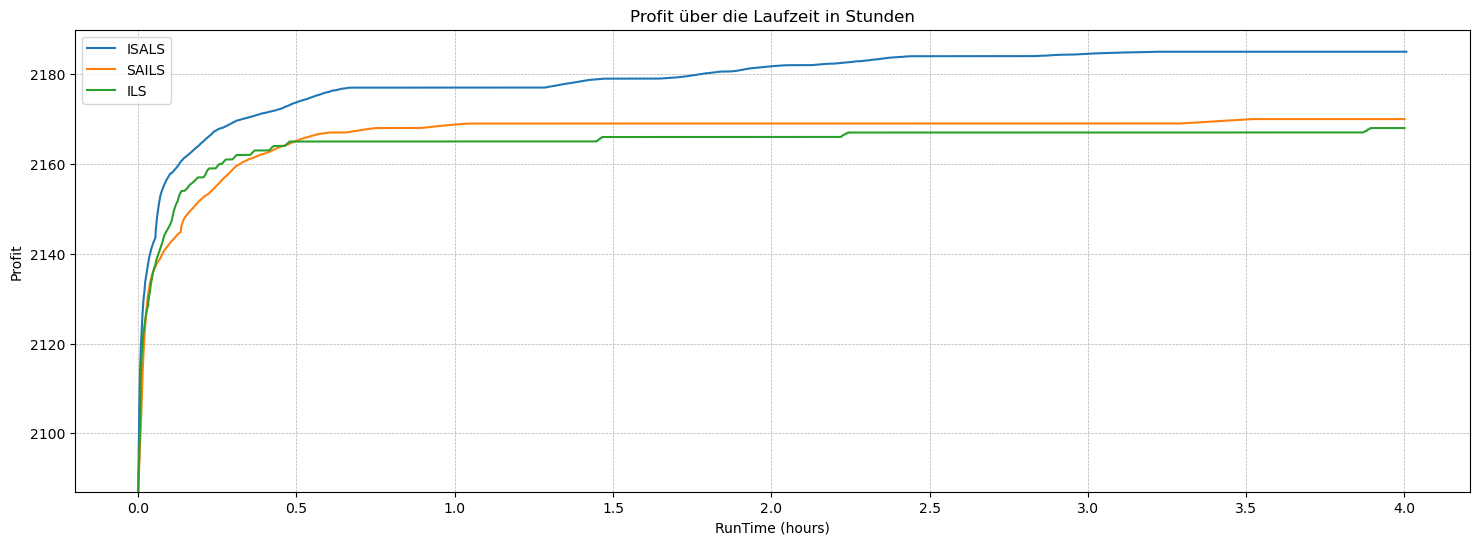

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# CSV files list
csv_files = ['ISALS_7_8_1_profit_over_time.csv', 'SAILS_7_8_1_profit_over_time.csv', 'ILS_7_8_1_profit_over_time.csv']

# Read data from all CSV files and store them in a list of DataFrames
data_frames = []
for file in csv_files:
    df = pd.read_csv(file)
    df['Hours'] = df['RunTime'] / 3600  # Convert RunTime from seconds to hours
    df['Timedelta'] = pd.to_timedelta(df['Hours'], unit='h')  # Convert hours to TimedeltaIndex
    df.set_index('Timedelta', inplace=True)  # Set Timedelta as the index
    df['Algorithm'] = file.split('_')[0]  # Add a column for the algorithm name
    data_frames.append(df)

# Calculate the minimum profit value across all data frames
min_profit = min(df['Profit'].min() for df in data_frames)

# Create the plot for profit over time for each CSV file
plt.figure(figsize=(18, 6))
for df in data_frames:
    # Smoothing the profit curve
    df['Profit_smoothed'] = df['Profit'].rolling(window=50, min_periods=1).mean()
    plt.plot(df.index.total_seconds() / 3600, df['Profit_smoothed'], label=df['Algorithm'].iloc[0])

plt.xlabel('RunTime (hours)')
plt.ylabel('Profit')
plt.title('Profit über die Laufzeit in Stunden')

# Add grid for better readability
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# Set the y-axis lower limit to the lowest profit value found
plt.ylim(bottom=min_profit)

# Improved legend positioning
plt.legend(loc='best')

# Save the plot in both PNG and PDF formats
plt.savefig('profit_over_time.png', dpi=300)
plt.savefig('profit_over_time.pdf', dpi=300)

# Display the plot
plt.show()



In [14]:
# Create a DataFrame for the profits every 0.5 hours and calculate the growth
results = []

for df in data_frames:
    # Select only numeric columns (e.g., 'Profit') before resampling
    numeric_columns = df[['Profit']]
    
    # Resample to get values every 0.5 hours (or closest available time point)
    resampled_df = numeric_columns.resample('30min').mean()  # Resample every 30 minutes
    resampled_df['Profit Growth'] = resampled_df['Profit'].diff()  # Calculate profit growth
    
    # Add the algorithm name back to the resampled DataFrame
    resampled_df['Algorithm'] = df['Algorithm'].iloc[0]  
    results.append(resampled_df[['Profit', 'Profit Growth', 'Algorithm']])

# Combine the results into a single DataFrame
combined_results = pd.concat(results).reset_index()
combined_results['Hours'] = combined_results['Timedelta'].dt.total_seconds() / 3600
combined_results.drop('Timedelta', axis=1, inplace=True)
combined_results

,Profit,Profit Growth,Algorithm,Hours
0,2163.386207,NaN,ISALS,0.0
1,2176.981595,13.595388,ISALS,0.5
2,2177.705882,0.724287,ISALS,1.0
3,2180.388158,2.682276,ISALS,1.5
4,2183.221311,2.833154,ISALS,2.0
5,2184.269231,1.047919,ISALS,2.5
6,2185.000000,0.730769,ISALS,3.0
7,2185.000000,0.000000,ISALS,3.5
8,2185.000000,0.000000,ISALS,4.0
9,2157.321739,NaN,SAILS,0.0
